In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
with open('../Result/coo_relation.json') as f:
    coo_relation = json.load(f)
with open('../Result/url_index.json') as f:
    url_index= json.load(f)

In [3]:
coo_relation

{'https://dblp.org/pid/135/4661.html': {'2023': ['https://dblp.org/pid/s/JuliaStoyanovich.html',
   'https://dblp.org/pid/185/4349.html',
   'https://dblp.org/pid/82/231.html'],
  '2022': ['https://dblp.org/pid/185/4349.html',
   'https://dblp.org/pid/82/231.html',
   'https://dblp.org/pid/m/TovaMilo.html'],
  '2021': ['https://dblp.org/pid/185/4349.html',
   'https://dblp.org/pid/98/6876.html',
   'https://dblp.org/pid/m/TovaMilo.html'],
  '2020': ['https://dblp.org/pid/185/4349.html',
   'https://dblp.org/pid/m/TovaMilo.html',
   'https://dblp.org/pid/98/6876.html'],
  '2019': ['https://dblp.org/pid/185/4349.html',
   'https://dblp.org/pid/m/TovaMilo.html',
   'https://dblp.org/pid/98/6876.html'],
  '2018': ['https://dblp.org/pid/98/6876.html'],
  '2017': ['https://dblp.org/pid/98/6876.html'],
  '2016': ['https://dblp.org/pid/98/6876.html'],
  '2015': ['https://dblp.org/pid/98/6876.html',
   'https://dblp.org/pid/t/ValTannen.html'],
  '2014': ['https://dblp.org/pid/98/6876.html',
   

In [6]:
#change the key of coo_relation from url to year
coo_relation_year = {}
for url in coo_relation:
    for year in coo_relation[url]:
        if year not in coo_relation_year:
            coo_relation_year[year] = {}
        coo_relation_year[year][url] = coo_relation[url][year]

In [7]:
coo_relation_year

{'2023': {'https://dblp.org/pid/135/4661.html': ['https://dblp.org/pid/s/JuliaStoyanovich.html',
   'https://dblp.org/pid/185/4349.html',
   'https://dblp.org/pid/82/231.html'],
  'https://dblp.org/pid/127/0138.html': [],
  'https://dblp.uni-trier.de/pid/66/3027.html': [],
  'https://dblp.org/pid/06/9379.html': ['https://dblp.org/pid/g/ParkeGodfrey.html'],
  'https://dblp.org/pid/09/3737.html': ['https://dblp.org/pid/72/36.html'],
  'https://dblp.org/pid/80/2320.html': ['https://dblp.org/pid/183/8663.html',
   'https://dblp.org/pid/l/FeifeiLi.html',
   'https://dblp.org/pid/75/3108.html'],
  'https://dblp.org/pid/127/6172-1.html': ['https://dblp.org/pid/86/508-2.html',
   'https://dblp.org/pid/140/7434.html',
   'https://dblp.org/pid/41/1074-1.html',
   'https://dblp.org/pid/76/1735.html',
   'https://dblp.org/pid/149/1281.html',
   'https://dblp.org/pid/d/GDobbie.html',
   'https://dblp.org/pid/33/3180.html',
   'https://dblp.org/pid/77/2970-1.html'],
  'https://dblp.org/pid/m/RJMille

In [9]:
#url to index
coo_relation_year_edge = {}
for year in coo_relation_year:
    coo_relation_year_edge[year] = []
    for url1 in coo_relation_year[year]:
        for url2 in coo_relation_year[year][url1]:
            edge = (url_index[url1], url_index[url2])
            coo_relation_year_edge[year].append(edge)

In [10]:
coo_relation_year_edge

{'2023': [(11, 286),
  (11, 454),
  (11, 645),
  (1, 575),
  (12, 472),
  (7, 383),
  (7, 459),
  (7, 80),
  (15, 895),
  (15, 302),
  (15, 298),
  (15, 658),
  (15, 948),
  (15, 672),
  (15, 349),
  (15, 372),
  (3, 93),
  (3, 769),
  (3, 897),
  (6, 193),
  (6, 467),
  (6, 478),
  (6, 780),
  (6, 988),
  (6, 1042),
  (6, 631),
  (6, 763),
  (6, 375),
  (6, 759),
  (6, 982),
  (6, 622),
  (6, 407),
  (6, 784),
  (6, 315),
  (6, 969),
  (18, 272),
  (19, 583),
  (19, 95),
  (19, 476),
  (19, 193),
  (19, 312),
  (19, 822),
  (19, 255),
  (19, 577),
  (19, 387),
  (19, 961),
  (19, 153),
  (5, 509),
  (21, 692),
  (10, 41),
  (26, 323),
  (2, 835),
  (29, 428),
  (29, 281),
  (29, 180),
  (33, 355),
  (37, 380),
  (37, 194),
  (20, 132),
  (34, 536),
  (28, 323),
  (27, 448),
  (27, 897),
  (35, 318),
  (51, 486),
  (8, 95),
  (8, 195),
  (8, 487),
  (8, 993),
  (8, 822),
  (8, 225),
  (8, 1026),
  (8, 645),
  (8, 700),
  (8, 740),
  (8, 542),
  (8, 470),
  (25, 578),
  (25, 986),
  (25

In [18]:
with open('../Result/year_edge.json', 'w') as f:
    json.dump(coo_relation_year_edge, f)

In [11]:
#build graph
coo_relation_year_graph = {}
for year in coo_relation_year_edge:
    coo_relation_year_graph[year] = nx.Graph()
    coo_relation_year_graph[year].add_edges_from(coo_relation_year_edge[year])
    

In [ ]:
for year in coo_relation_year_graph:
    print(year)
    year_graph = coo_relation_year_graph[year]
    #draw graph
    plt.figure(figsize=(20,20))
    nx.draw(year_graph, with_labels=True, font_size=10, node_size=1000)
    plt.savefig('../Result/Graph/'+year+'.png')
    

In [3]:
with open('../Result/year_edge.json') as f:
    year_edge = json.load(f)

In [23]:
total_edge = []
for year in year_edge:
    total_edge += [tuple(edge) for edge in year_edge[year]]

In [24]:
set(total_edge)

{(426, 486),
 (445, 499),
 (193, 692),
 (36, 974),
 (843, 545),
 (623, 276),
 (158, 442),
 (168, 635),
 (460, 255),
 (312, 91),
 (501, 27),
 (468, 604),
 (10, 692),
 (27, 107),
 (192, 211),
 (794, 545),
 (513, 1020),
 (747, 204),
 (2, 50),
 (246, 676),
 (824, 387),
 (268, 169),
 (213, 270),
 (397, 845),
 (883, 967),
 (327, 749),
 (841, 970),
 (440, 397),
 (522, 207),
 (44, 168),
 (315, 631),
 (549, 569),
 (77, 988),
 (516, 163),
 (157, 459),
 (272, 971),
 (707, 108),
 (270, 107),
 (165, 579),
 (8, 107),
 (739, 851),
 (621, 41),
 (1020, 46),
 (736, 287),
 (765, 988),
 (331, 467),
 (983, 393),
 (854, 279),
 (1048, 559),
 (229, 456),
 (344, 177),
 (1051, 564),
 (187, 459),
 (1054, 44),
 (622, 387),
 (21, 692),
 (274, 872),
 (971, 46),
 (184, 161),
 (499, 990),
 (195, 993),
 (372, 397),
 (532, 349),
 (38, 1046),
 (575, 985),
 (994, 151),
 (763, 403),
 (1007, 1029),
 (174, 8),
 (270, 470),
 (46, 991),
 (165, 942),
 (8, 470),
 (46, 762),
 (961, 95),
 (1054, 286),
 (737, 121),
 (843, 1042),
 

In [25]:
G=nx.Graph()
G.add_edges_from(total_edge)

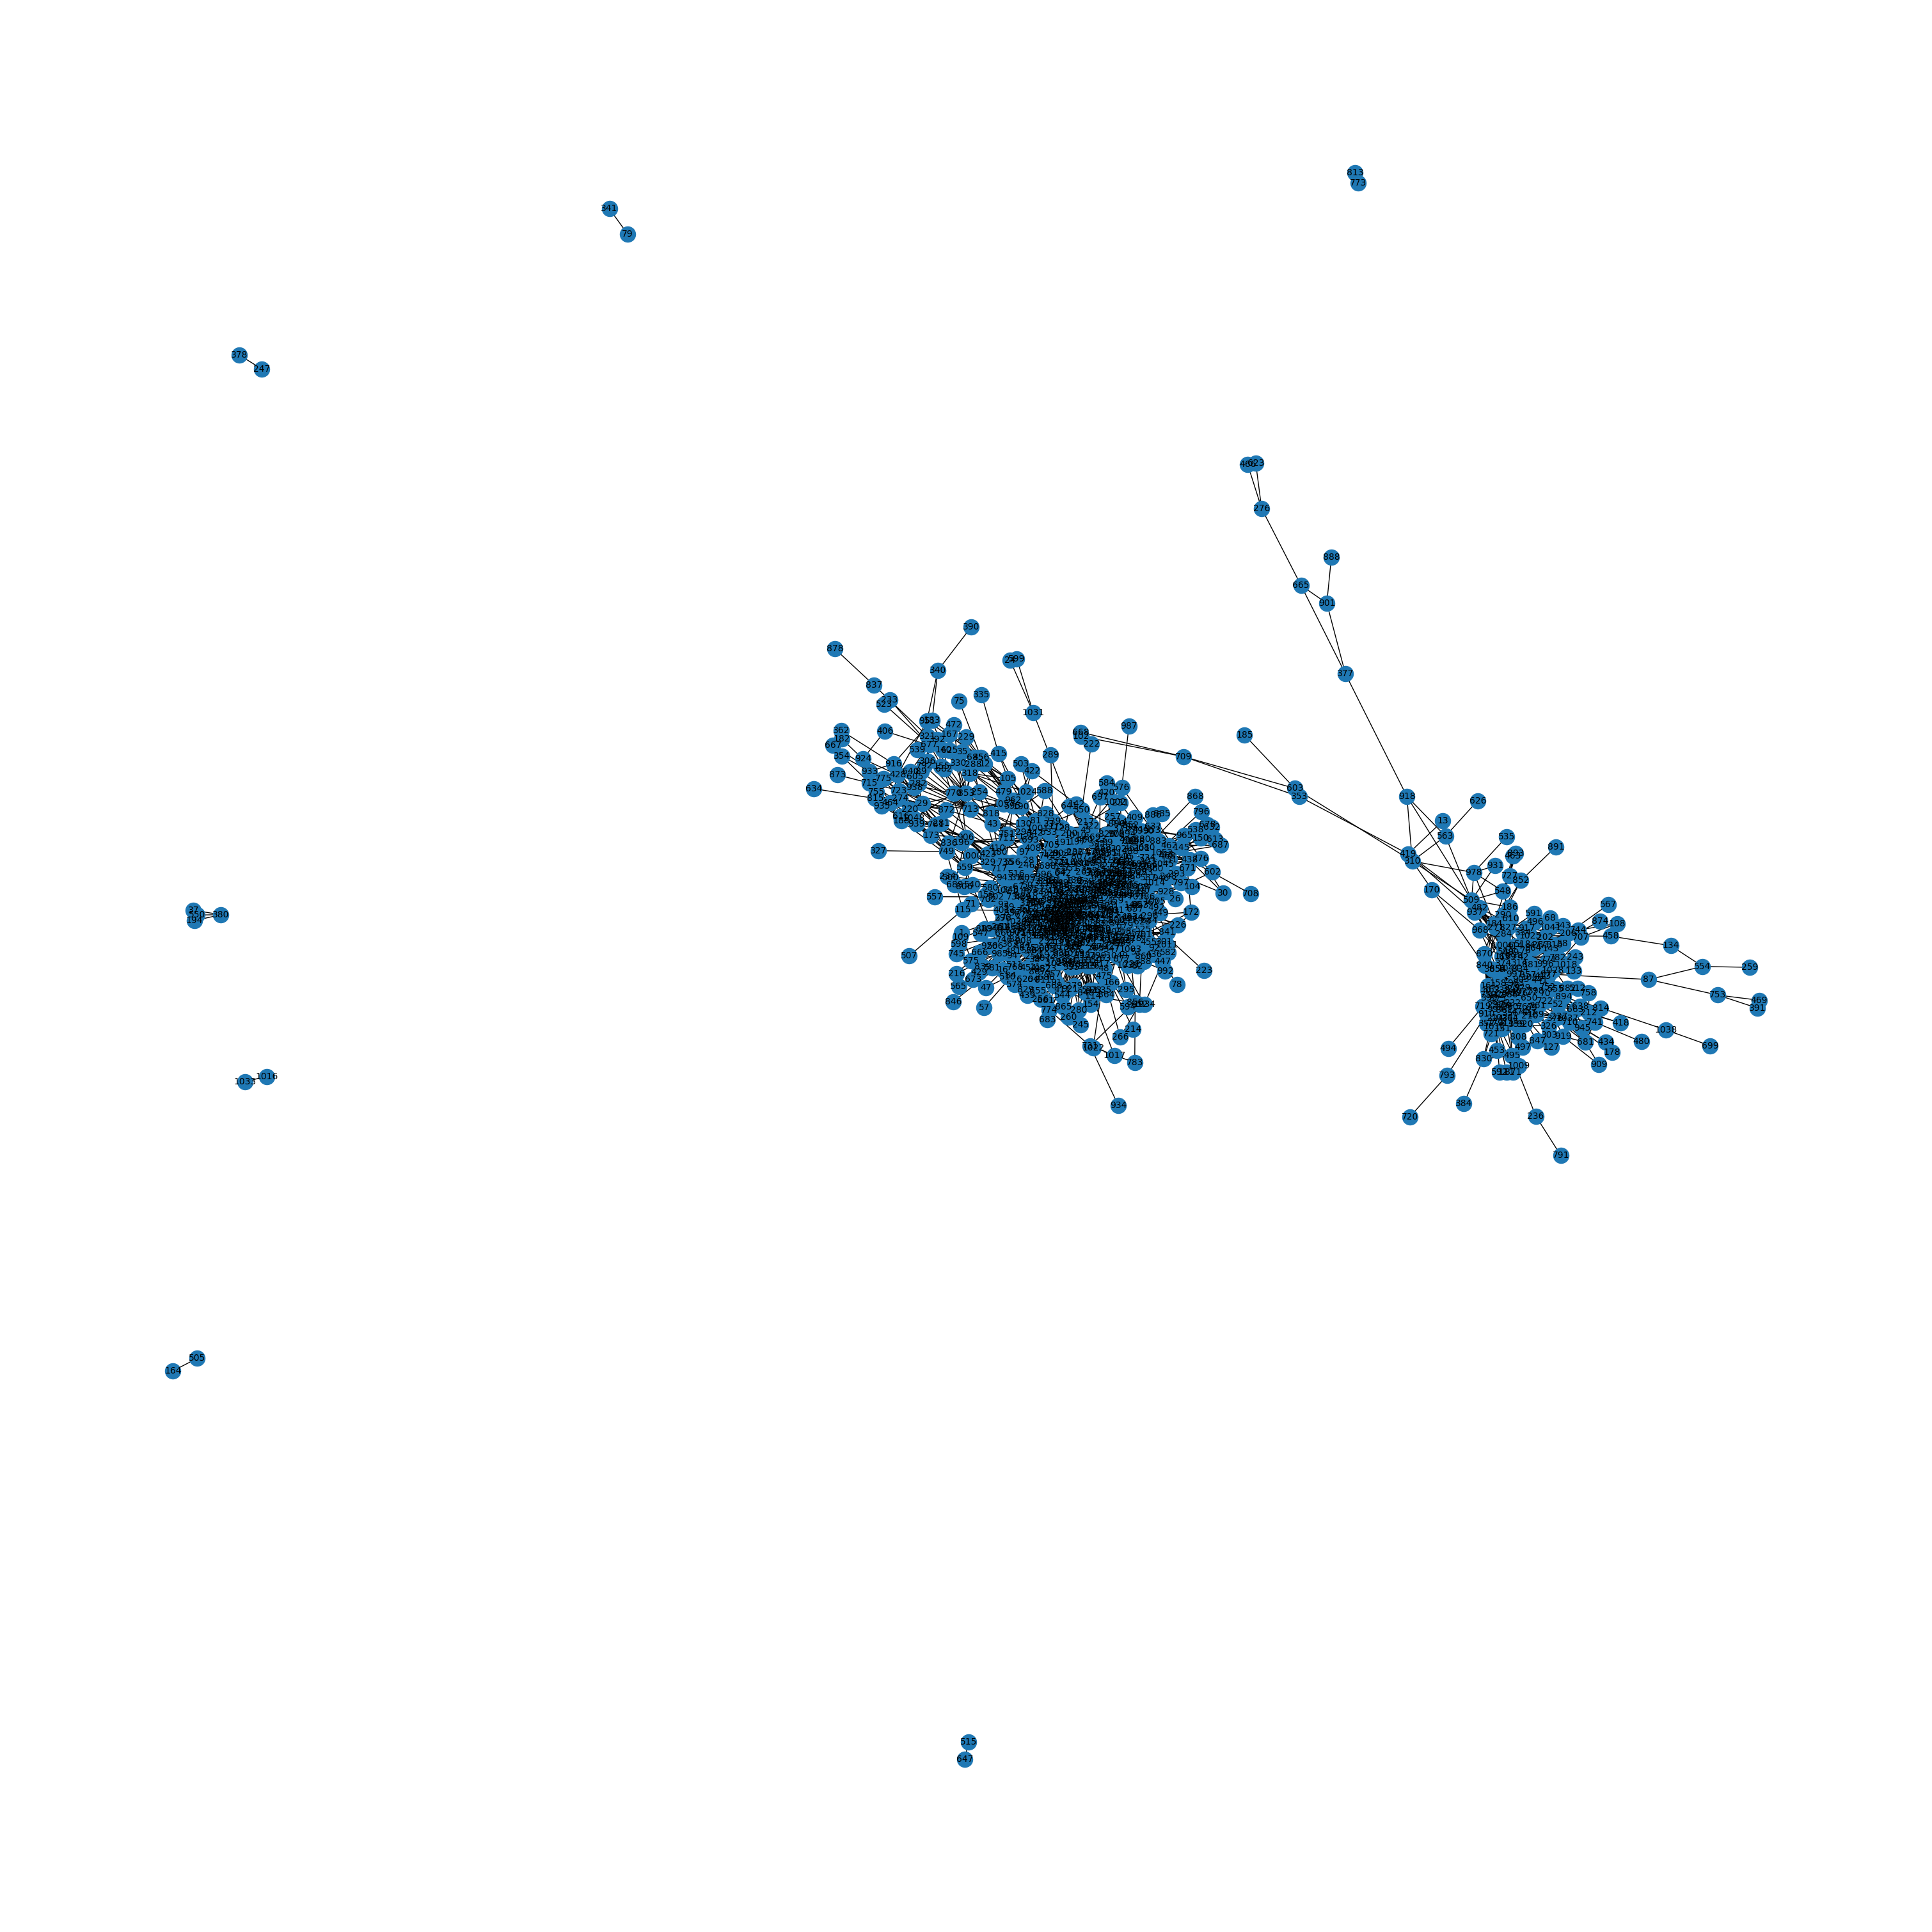

In [31]:
plt.figure(figsize=(30,30))
nx.draw(G, with_labels=True, font_size=10, node_size=300)
plt.savefig('../Result/Graph/total.png')